In [45]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [46]:
cleanData = pickle.load( open( "cleanData.p", "rb" ) )
cleanData.sort_values(by=['line','terminal','depart'],inplace=True)
cleanData.reset_index(drop=True, inplace=True)
cleanData.head()

,line,dayType,travelId,trainId,notDispach,notDispachDetails,amountCars,dispached,terminal,depart
0,A,F,1,4,NaN,NaN,5,N,1,2015-01-01 07:32:00
1,A,F,2,5,NaN,NaN,5,N,1,2015-01-01 07:42:00
2,A,F,3,6,NaN,NaN,5,S,1,2015-01-01 07:52:00
3,A,F,4,1,NaN,NaN,5,S,1,2015-01-01 08:00:00
4,A,F,5,2,NaN,NaN,5,S,1,2015-01-01 08:09:20


In [47]:
#only dispatched trains
cleanData = cleanData[cleanData.dispached == 'S' ]

In [ ]:
#clean extrange rows
#notDispach == VNC, viaje no comercial, sin pasajeros
#con este filtro, todos los train id 0 son A
# trainId == 0 puede ser un notDispach  == A que es tren adicional, no se considera un no despacho 
# a su vez el amount of cars 0 muchos se explican por este tren adicional 

# amountCars == 0
# travelId == 0

#caca = cleanData[cleanData.trainId == 0 ]
#caca.travelId.value_counts()

In [48]:
cleanData['departLag'] = cleanData.depart.shift(1)
cleanData['delay'] = cleanData.depart - cleanData.departLag
cleanData.head()



,line,dayType,travelId,trainId,notDispach,notDispachDetails,amountCars,dispached,terminal,depart,departLag,delay
2,A,F,3,6,NaN,NaN,5,S,1,2015-01-01 07:52:00,NaT,NaT
3,A,F,4,1,NaN,NaN,5,S,1,2015-01-01 08:00:00,2015-01-01 07:52:00,00:08:00
4,A,F,5,2,NaN,NaN,5,S,1,2015-01-01 08:09:20,2015-01-01 08:00:00,00:09:20
5,A,F,6,3,NaN,NaN,5,S,1,2015-01-01 08:18:40,2015-01-01 08:09:20,00:09:20
6,A,F,7,4,NaN,NaN,5,S,1,2015-01-01 08:28:00,2015-01-01 08:18:40,00:09:20


In [49]:
cleanData['departDay'] = cleanData.depart.map(lambda x: x.day)
cleanData['departLagDay'] = cleanData.departLag.map(lambda x: x.day)

In [54]:
cleanData['departCheck'] = ~(cleanData.departDay == cleanData.departLagDay)
cleanData.head(100)

,line,dayType,travelId,trainId,notDispach,notDispachDetails,amountCars,dispached,terminal,depart,departLag,delay,departDay,departLagDay,departCheck
2,A,F,3,6,NaN,NaN,5,S,1,2015-01-01 07:52:00,NaT,NaT,1,NaN,True
3,A,F,4,1,NaN,NaN,5,S,1,2015-01-01 08:00:00,2015-01-01 07:52:00,00:08:00,1,1.0,False
4,A,F,5,2,NaN,NaN,5,S,1,2015-01-01 08:09:20,2015-01-01 08:00:00,00:09:20,1,1.0,False
5,A,F,6,3,NaN,NaN,5,S,1,2015-01-01 08:18:40,2015-01-01 08:09:20,00:09:20,1,1.0,False
6,A,F,7,4,NaN,NaN,5,S,1,2015-01-01 08:28:00,2015-01-01 08:18:40,00:09:20,1,1.0,False
7,A,F,8,5,NaN,NaN,5,S,1,2015-01-01 08:37:20,2015-01-01 08:28:00,00:09:20,1,1.0,False
8,A,F,9,6,NaN,NaN,5,S,1,2015-01-01 08:46:40,2015-01-01 08:37:20,00:09:20,1,1.0,False
9,A,F,10,1,NaN,NaN,5,S,1,2015-01-01 08:56:00,2015-01-01 08:46:40,00:09:20,1,1.0,False
10,A,F,11,2,NaN,NaN,5,S,1,2015-01-01 09:05:20,2015-01-01 08:56:00,00:09:20,1,1.0,False
11,A,F,12,3,NaN,NaN,5,S,1,2015-01-01 09:14:40,2015-01-01 09:05:20,00:09:20,1,1.0,False


In [65]:
cleanData.delay[cleanData.departCheck] = pd.NaT
cleanData.drop(['departDay','departLagDay','departCheck'], axis = 1, inplace = True)

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
cleanData.head(100)

,line,dayType,travelId,trainId,notDispach,notDispachDetails,amountCars,dispached,terminal,depart,departLag,delay
2,A,F,3,6,NaN,NaN,5,S,1,2015-01-01 07:52:00,NaT,NaT
3,A,F,4,1,NaN,NaN,5,S,1,2015-01-01 08:00:00,2015-01-01 07:52:00,00:08:00
4,A,F,5,2,NaN,NaN,5,S,1,2015-01-01 08:09:20,2015-01-01 08:00:00,00:09:20
5,A,F,6,3,NaN,NaN,5,S,1,2015-01-01 08:18:40,2015-01-01 08:09:20,00:09:20
6,A,F,7,4,NaN,NaN,5,S,1,2015-01-01 08:28:00,2015-01-01 08:18:40,00:09:20
7,A,F,8,5,NaN,NaN,5,S,1,2015-01-01 08:37:20,2015-01-01 08:28:00,00:09:20
8,A,F,9,6,NaN,NaN,5,S,1,2015-01-01 08:46:40,2015-01-01 08:37:20,00:09:20
9,A,F,10,1,NaN,NaN,5,S,1,2015-01-01 08:56:00,2015-01-01 08:46:40,00:09:20
10,A,F,11,2,NaN,NaN,5,S,1,2015-01-01 09:05:20,2015-01-01 08:56:00,00:09:20
11,A,F,12,3,NaN,NaN,5,S,1,2015-01-01 09:14:40,2015-01-01 09:05:20,00:09:20


In [76]:
cleanData['month'] = cleanData.depart.map(lambda x: str(x.month) + '-' + str(x.year))
cleanData['delayInt'] = cleanData.delay / np.timedelta64(1, 'm')
cleanData.head()

,line,dayType,travelId,trainId,notDispach,notDispachDetails,amountCars,dispached,terminal,depart,departLag,delay,moth,month,delayInt
2,A,F,3,6,NaN,NaN,5,S,1,2015-01-01 07:52:00,NaT,NaT,1-2015,1-2015,NaN
3,A,F,4,1,NaN,NaN,5,S,1,2015-01-01 08:00:00,2015-01-01 07:52:00,00:08:00,1-2015,1-2015,8.000000
4,A,F,5,2,NaN,NaN,5,S,1,2015-01-01 08:09:20,2015-01-01 08:00:00,00:09:20,1-2015,1-2015,9.333333
5,A,F,6,3,NaN,NaN,5,S,1,2015-01-01 08:18:40,2015-01-01 08:09:20,00:09:20,1-2015,1-2015,9.333333
6,A,F,7,4,NaN,NaN,5,S,1,2015-01-01 08:28:00,2015-01-01 08:18:40,00:09:20,1-2015,1-2015,9.333333


In [81]:
cleanData.delayInt[~cleanData.delayInt.isnull()].describe()

count    1.379442e+06
mean     5.702352e+00
std      3.068813e+00
min      0.000000e+00
25%      3.683333e+00
50%      5.033333e+00
75%      7.233333e+00
max      3.400000e+02
Name: delayInt, dtype: float64

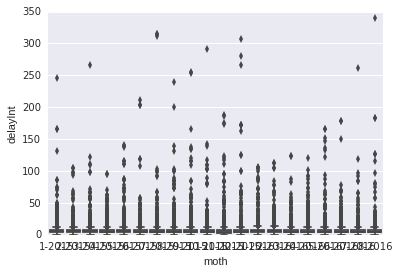

In [82]:
seaborn.boxplot(x = cleanData['moth'][~cleanData.delayInt.isnull()], y = cleanData['delayInt'][~cleanData.delayInt.isnull()])

In [ ]:
#seleccionar con una linea, un dia

#ordenarlo
dateFilter = (cleanData.depart[0].month == 1) & (cleanData.depart[0].year == 2015) & (cleanData.depart[0].day == 1)
lineFilter = cleanData.line == 'A'

subset = cleanData[dateFilter & lineFilter]

#posibles valores malos
subset = subset[subset.trainId > 0]



In [ ]:
subset.sort_values(by=['terminal','depart'],inplace=True)
subset['departLag'] = subset.depart.shift(1)
subset['delay'] = subset.depart - subset.departLag
subset.trainId.value_counts()

In [ ]:

subset.head()

In [ ]:
subset.head